## 5.7：支持向量机

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

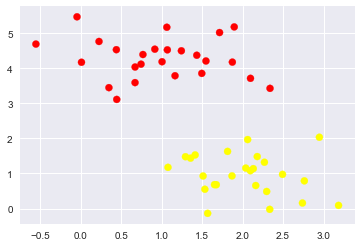

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

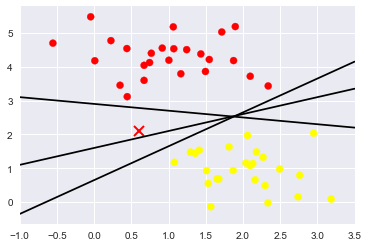

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### 5.7.2  支持向量机：边界最大化

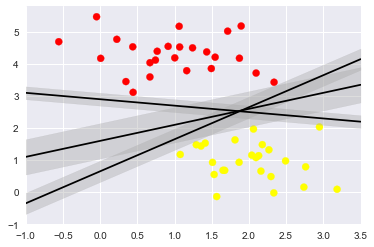

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

In [8]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

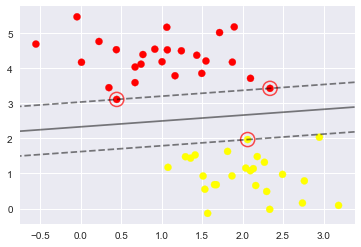

In [26]:

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #  plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        '''ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')'''
        plt.scatter(model.support_vectors_[:,0], 
                    model.support_vectors_[:,1], 
                    s=200, c='none', alpha=0.7, 
                    linewidth=1.5, edgecolor='red')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [18]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

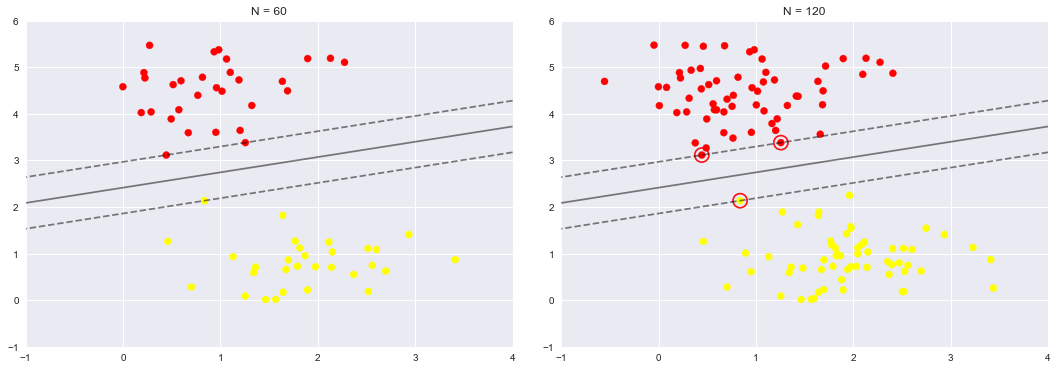

In [29]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi,N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [31]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,60,100, 200, 500], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 60, 100, 200, 500), value=10), Output()), _dom_classes=('widget-interact',))

#### 超越线性边界：核函数SVM模型

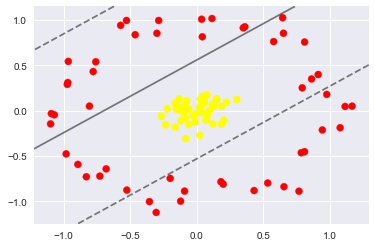

In [34]:
# 这个例子向我们展示用线性函数找不出一条超平面将线性不可分的数据集划分
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [43]:
# 我们可以使用径向基函数

r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=20, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 45, 90), value=-90), IntSlider(value=30, description='azim', max=90, min=-30), Output()), _dom_classes=('widget-interact',))

我们可以将核函数换成RBF

In [44]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

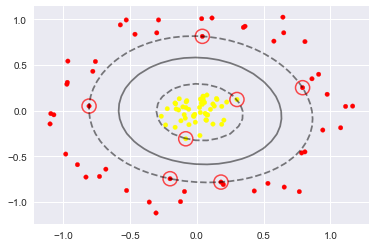

In [47]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap='autumn')
plot_svc_decision_function(clf);
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

#### SVM优化：软化边界

如何对数据集中一些重叠数据的处理？

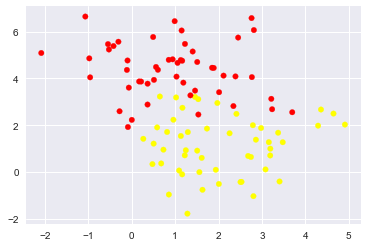

In [49]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='autumn');

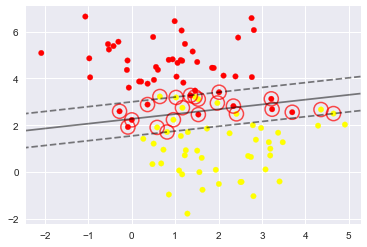

In [51]:
clf = SVC(kernel='linear', C=100)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='autumn');
plot_svc_decision_function(clf)

SVM提供了一个修正因子来“软化”边界为了取得更好的拟合效果，它允许一些点位于边界线之内。边界线的硬度可以通过超参数进行控制，通常是 C。如果 C 很大，边界就会很硬，数据点便不能在边界内“生存”；如果 C 比较小，边界线比较软，有一些数据点就可以穿越边界线。

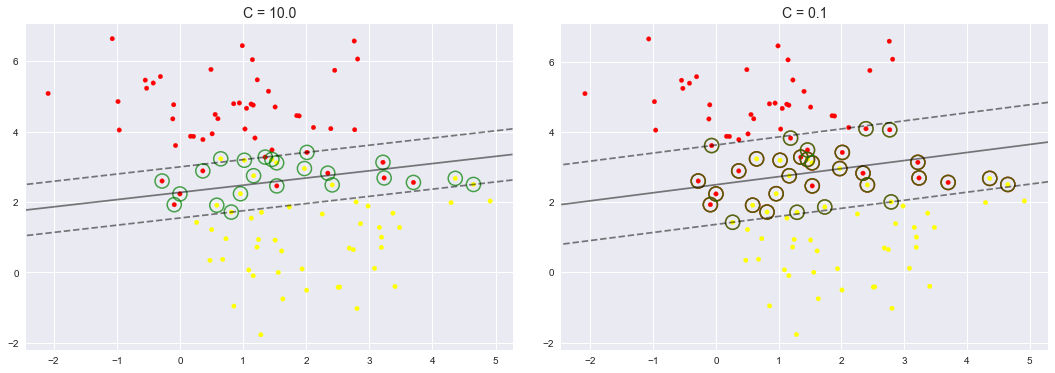

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn')
    plot_svc_decision_function(model, axi)
    '''axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')'''
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=200, c='none', alpha=0.7, 
                linewidth=1.5, edgecolor='green')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [55]:
from sklearn.datasets import fetch_lfw_people
#print(datasets.get_data_home())
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。

<ul>支持向量机是一种强大的分类方法，主要有四点理由。
    <li>模型依赖的支持向量比较少，说明它们都是非常精致的模型，消耗内存少。</li>
    <li>一旦模型训练完成，预测阶段的速度非常快。</li>
    <li>由于模型只受边界线附近的点的影响，因此它们对于高维数据的学习效果非常好——即使训练比样本维度还高的数据也没有问题，而这是其他算法难以企及的。</li>
    <li>与核函数方法的配合极具通用性，能够适用不同类型的数据。</li></ul>

<ul>但是，SVM 模型也有一些缺点。
    <li>随着样本量 N 的不断增加，最差的训练时间复杂度会达到 [N3]；经过高效处理后，也只能达到 [N2]。因此，大样本学习的计算成本会非常高。</li>
    <li>训练效果非常依赖于边界软化参数 C 的选择是否合理。这需要通过交叉检验自行搜索；当数据集较大时，计算量也非常大。</li>
    <li>预测结果不能直接进行概率解释。这一点可以通过内部交叉检验进行评估（具体请参见SVC 的 probability 参数的定义），但是评估过程的计算量也很大。</li>
</ul>

由于这些限制条件的存在，通常只会在其他简单、快速、调优难度小的方法不能满足需求时，才会选择支持向量机。但是，如果你的计算资源足以支撑 SVM 对数据集的训练和交叉检验，那么用它一定能获得极好的效果。